In [15]:
import cv2 as cv #melakukan import library cv2 sebagai cv
import matplotlib.pyplot as plt #melakukan import library matplotlib.pyplot sebagai plt
import numpy as np #melakukan import library numpy sebagai np
import math #mengimport library math agar dapat menggunakan fungsi-fungsi yang ada di dalammnya

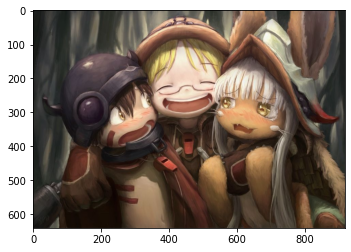

In [16]:
img = plt.imread("happy.jpg") #memgimport citra happy.jpg dengan fungsi imread pada library plt dan memasukkannya ke variabel img
plt.imshow(img) #menampilkan citra pada img

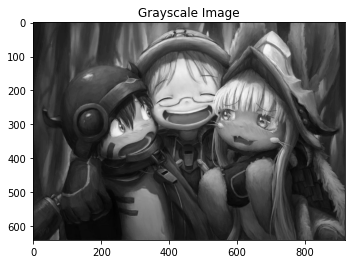

In [17]:
grayImg = cv.cvtColor(img, cv.COLOR_BGR2GRAY) #mengonversi warna dari BGR(dalam format cv2) ke GRAY
plt.title("Grayscale Image") #memberi judul pada citra yang ditampilkan dengan fungsi title pada plt
plt.imshow(grayImg, cmap='gray') #menampilkan citra yang telah diubah ke grayscale

In [18]:
padding = np.pad(grayImg,[1],'constant') #membuat zero padding terhadap citra grayscale
print(padding[0:len(grayImg)+2,0:len(grayImg[0])+2]) #mencetak matriks citra yang telah dilakukan padding

[[ 0  0  0 ...  0  0  0]
 [ 0 45 35 ... 36 35  0]
 [ 0 41 31 ... 32 32  0]
 ...
 [ 0 28 19 ... 31 30  0]
 [ 0 31 22 ... 36 36  0]
 [ 0  0  0 ...  0  0  0]]


# Operator Sobel

In [19]:
#mendefinisikan kernel dari operator sobel
#kernel ini yang digunakan dalam operator sobel untuk melakukan operasi pendeteksian tepi
Sx  = np.array([[-1,0,1],
                [-2,0,2],
                [-1,0,1]])

Sy  = np.array([[1,2,1],
                [0,0,0],
                [-1,-2,-1]])

print("Sx:\n", Sx)
print("\nSy:\n", Sy)

Sx:
 [[-1  0  1]
 [-2  0  2]
 [-1  0  1]]

Sy:
 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


In [20]:
#mendefinisikan fungsi untuk melakukan operasi pendeteksian tepi dengan operator sobel 
def sobelOperator(img, pad, sx, sy):
    gx = np.zeros([len(img), len(img[0])]) #membuat matriks nol dengan fungsi zeros pada library numpy dengan ukuran diambil dari panjang dan lebar citra
    gy = np.zeros([len(img), len(img[0])])
    result = np.zeros([len(img), len(img[0])]) #variabel result ini nantinya akan menampung hasil dari citra yang telah dilakukan operasi pendeteksian tepi
    kernel = np.zeros([3,3]) #variabel kernel berfungsi untuk menampung kernel yang akan digunakan dalam operasi
    #melakukan perulangan untuk melakukan operasi pendeteksian tepi 
    for x in range (2):
        if x==0: #cek apabila x = 0 maka kernel yang digunakan adalah sx
            kernel = sx
        else: #jika tidak maka kernel yang digunakan sy
            kernel = sy
        #melakukan perulangan i dari 1 sampai panjang dari padding-1
        for i in range (1, len(pad)-1):
            for j in range (1, len(pad[0])-1):#melakukan perulangan j dari 1 sampai panjang dari padding-1
                #a b dan c variabel yang menampung setiap indeks dari citra yang telah dipadding di kalikan dengan kernel
                a = pad[i-1,j-1]*kernel [0,0] + pad[i-1,j]*kernel [0,1] + pad[i-1,j+1]*kernel [0,2]
                b = pad[i,j-1]*kernel [1,0] + pad[i,j]*kernel [1,1] + pad[i,j+1]*kernel [1,2]
                c = pad[i+1,j-1]*kernel [2,0] + pad[i+1,j]*kernel [2,1] + pad[i+1,j+1]*kernel [2,2]
                if x == 0: #cek apabila x = 0 maka gx pada indeks i-1, j-1 lah yang menampung a+b+c
                    gx[i-1, j-1] = a+b+c
                else: #jika tidak maka gy pada indeks i-1, j-1 lah yang menampung a+b+c
                    gy[i-1, j-1] = a+b+c
    #perulangan untuk menghitung langkah pengoperasian selanjutnya                
    for i in range (len(img)):
        for j in range (len(img[0])):
            #dimana setiap indeks pada gx dan gy pangkat 2 di jumlahkan dan di akarkan
            op = round(math.sqrt((gx[i,j]**2)+(gy[i,j]**2)))
            #result akan menampung variabel op sebagai hasil dari pengoperasian dgn operator sobel
            result[i,j] = op
    #membalikkan nilai dari result sebagai nilai dari fungsi
    return result
    

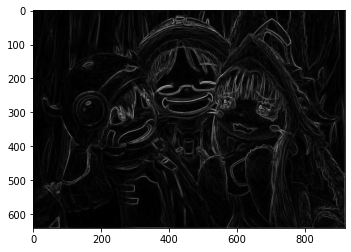

In [21]:
#variabel sobelOp akan menampung hasil fungsi sobelOperator yang outputnya merupakan citra yang telah dilakukan operasi pendeteksian tepi dengan sobel operator
sobelOp = sobelOperator(grayImg, padding, Sx, Sy)
#menampilkan citra hasil pendeteksian tepi dengan sobel operator 
plt.imshow(sobelOp, cmap='gray')

# Operator Prewitt

In [22]:
#mendefinisikan kernel dari operator prewitt
#kernel ini yang digunakan dalam operator prewitt untuk melakukan operasi pendeteksian tepi
Px  = np.array([[-1,0,1],
                [-1,0,1],
                [-1,0,1]])

Py  = np.array([[1,1,1],
                [0,0,0],
                [-1,-1,-1]])

print("Px:\n", Px)
print("\nPy:\n", Py)

Px:
 [[-1  0  1]
 [-1  0  1]
 [-1  0  1]]

Py:
 [[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


In [23]:
#mendefinisikan fungsi untuk melakukan operasi pendeteksian tepi dengan operator prewitt 
def prewittOperator(img, pad, px, py):
    gx = np.zeros([len(img), len(img[0])])#membuat matriks nol dengan fungsi zeros pada library numpy dengan ukuran diambil dari panjang dan lebar citra
    gy = np.zeros([len(img), len(img[0])])
    result = np.zeros([len(img), len(img[0])])#variabel result ini nantinya akan menampung hasil dari citra yang telah dilakukan operasi pendeteksian tepi
    kernel = np.zeros([3,3])#variabel kernel berfungsi untuk menampung kernel yang akan digunakan dalam operasi
    #melakukan perulangan untuk melakukan operasi pendeteksian tepi
    for x in range(2):
        if x ==0:#cek apabila x = 0 maka kernel yang digunakan adalah px
            kernel = px
        else:#jika tidak maka kernel yang digunakan py
            kernel = py
        #melakukan perulangan i dari 1 sampai panjang dari padding-1
        for i in range(1, len(pad)-1):
            for j in range(1, len(pad[0])-1):#melakukan perulangan j dari 1 sampai panjang dari padding-1
                #a b dan c variabel yang menampung setiap indeks dari citra yang telah dipadding di kalikan dengan kernel
                a = pad[i-1,j-1]*kernel [0,0] + pad[i-1,j]*kernel [0,1] + pad[i-1,j+1]*kernel [0,2]
                b = pad[i,j-1]*kernel [1,0] + pad[i,j]*kernel [1,1] + pad[i,j+1]*kernel [1,2]
                c = pad[i+1,j-1]*kernel [2,0] + pad[i+1,j]*kernel [2,1] + pad[i+1,j+1]*kernel [2,2]

                if x == 0:#cek apabila x = 0 maka gx pada indeks i-1, j-1 lah yang menampung a+b+c
                    gx[i-1, j-1] = a+b+c
                else:#jika tidak maka gy pada indeks i-1, j-1 lah yang menampung a+b+c
                    gx[i-1, j-1] = a+b+c
    #perulangan untuk menghitung langkah pengoperasian selanjutnya
    for i in range(len(img)):
        for j in range (len(img[0])):
            op = round(math.sqrt((gx[i,j]**2)+(gy[i,j]**2))) #dimana setiap indeks pada gx dan gy pangkat 2 di jumlahkan dan di akarkan
            result[i,j] = op #result akan menampung variabel op sebagai hasil dari pengoperasian dgn operator prewitt
    #membalikkan nilai dari result sebagai nilai dari fungsi
    return result

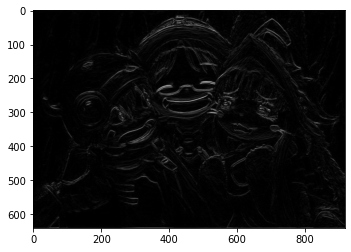

In [24]:
#variabel prewitt akan menampung hasil fungsi prewittOperator yang outputnya merupakan citra yang telah dilakukan operasi pendeteksian tepi dengan prewitt operator
prewitt = prewittOperator(grayImg, padding, Px, Py)
#menampilkan citra hasil pendeteksian tepi dengan prewitt operator 
plt.imshow(prewitt, cmap='gray')

# Operator Robert

In [25]:
#mendefinisikan kernel dari operator robert
#kernel ini yang digunakan dalam operator robert untuk melakukan operasi pendeteksian tepi
Rx  = np.array([[1,0],
                [0,-1]])

Ry  = np.array([[0,1],
                [-1,0]])

print("Rx:\n", Rx)
print("\nRy:\n", Ry)

Rx:
 [[ 1  0]
 [ 0 -1]]

Ry:
 [[ 0  1]
 [-1  0]]


In [26]:
#mendefinisikan fungsi untuk melakukan operasi pendeteksian tepi dengan operator robert
def robertOperator(img, pad, rx, ry):
    gx = np.zeros([len(img), len(img[0])])#membuat matriks nol dengan fungsi zeros pada library numpy dengan ukuran diambil dari panjang dan lebar citra
    gy = np.zeros([len(img), len(img[0])])
    result = np.zeros([len(img), len(img[0])]) #variabel result ini nantinya akan menampung hasil dari citra yang telah dilakukan operasi pendeteksian tepi
    kernel = np.zeros([3,3])#variabel kernel berfungsi untuk menampung kernel yang akan digunakan dalam operasi
    #melakukan perulangan untuk melakukan operasi pendeteksian tepi
    for x in range(2):
        if x == 0:#cek apabila x = 0 maka kernel yang digunakan adalah px
            kernel = rx
        else:#jika tidak maka kernel yang digunakan py
            kernel = ry
            #melakukan perulangan i dari 1 sampai panjang dari padding-1
            for i in range (1, len(pad)-1):
                for j in range(1, len(pad[0])-1):#melakukan perulangan j dari 1 sampai panjang dari padding-1
                #a b dan c variabel yang menampung setiap indeks dari citra yang telah dipadding di kalikan dengan kernel
                    a = pad[i-1, j-1]*kernel[0,0]+pad[i-1,j]*kernel[0,1]
                    b = pad[i, j-1]*kernel[1,0]+pad[i,j]*kernel[1,1]
                    
                    if x==0: #cek apabila x = 0 maka gx pada indeks i-1, j-1 lah yang menampung a+b+c
                        gx[i-1, j-1] = a+b
                    else: #jika tidak maka gy pada indeks i-1, j-1 lah yang menampung a+b+c   
                        gy[i-1, j-1] = a+b
    #perulangan untuk menghitung langkah pengoperasian selanjutnya
    for i in range(len(img)):
        for j in range(len(img[0])):
            op = round(math.sqrt((gx[i,j]**2)+(gy[i,j]**2)))#dimana setiap indeks pada gx dan gy pangkat 2 di jumlahkan dan di akarkan
            result[i,j] = op #result akan menampung variabel op sebagai hasil dari pengoperasian dgn operator robert
    #membalikkan nilai dari result sebagai nilai dari fungsi
    return result

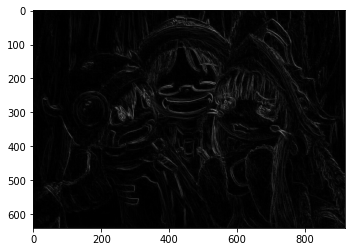

In [27]:
#variabel robert akan menampung hasil fungsi robertOperator yang outputnya merupakan citra yang telah dilakukan operasi pendeteksian tepi dengan robert operator
robert = robertOperator(grayImg, padding, Rx, Ry)
#menampilkan citra hasil pendeteksian tepi dengan robert operator
plt.imshow(robert, cmap='gray')

Dapat dlihat dari ketiga operator yang digunakan terdapat output yang berbeda, pada pada proses pengerjaannya sama saja. Hal yang membedakan antara ketiganya yaitu terdapat pada filter/kernelnya. Pada output Operator Sobel, tepi dapat terlihat jelas karena fungsi dari operasi ini sangat sensitif terhadap tepian diagonal daripada horizontal dan vertikal. Pada output Operator Prewitt, fungsi akan sangat sensitif terhadap tepi horizontal dan vertikal daripada tepi diagonalnya. Hal ini diakibatkan dari terdapatnya pengurangan pada elemen tengah matriks kernel. Output dari Operator Robert kurang nampak tepian dari sisi horizontal dan vertikal karena kernel dari Operator Robert hanya menekankan pada pemeriksaan kedua arah diagonal. Meskipun demikian, objek dideteksi akan terdeteksi lebih baik pada sisi-sisi miringnya.
Dari ketiga operator yang telah digunakan berdasarkan output yang dihasilkan maka Operator Sobel merupakan metode deteksi tepi terbaik. 